In [2]:
import numpy as np
import ehtim as eh
from glob import glob
import matplotlib.pyplot as plt
import kgeo as kg
import kgeo.bfields as kb
#from pmodes import *
from image_analysis import *
from kgeo.off_eq import *
from kgeo.image import *
import h5py
MoD = 3.77883459
import pickle
import h5py
import shutil

# $\theta=17^\circ$

In [22]:
dir1 = '/home/zgelles/Accretion/GRMHD/Software/ipoletests/ipole/'
im0 = eh.image.load_image('timeavg_eta1.h5')
im1 = eh.image.load_image(dir1+'image.h5')

Loading hdf5 image:  timeavg_eta1.h5
Loading hdf5 image:  /home/zgelles/Accretion/GRMHD/Software/ipoletests/ipole/image.h5


In [29]:
print(np.reshape(im0.imvec,(64,64))[10,32])
print(np.reshape(im1.imvec,(64,64))[10,32])

1.9630016027242352e-05
2.0212731954698413e-05


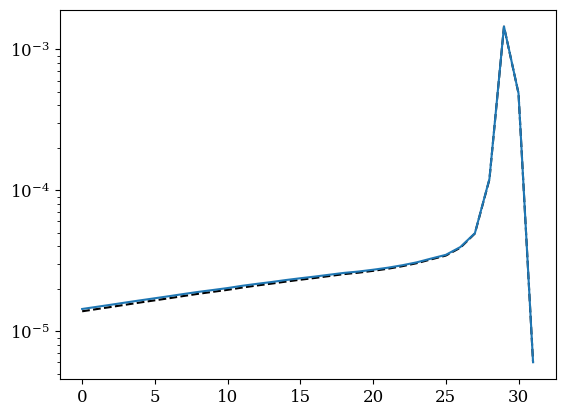

In [30]:
plt.semilogy(np.reshape(im0.imvec,(64,64))[:32,32],'k--')
plt.semilogy(np.reshape(im1.imvec,(64,64))[:32,32])

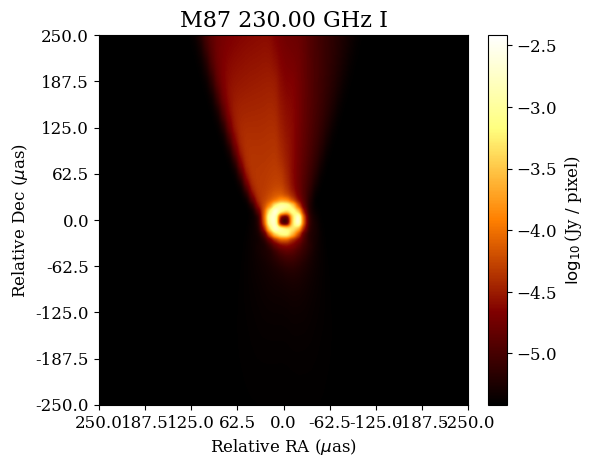

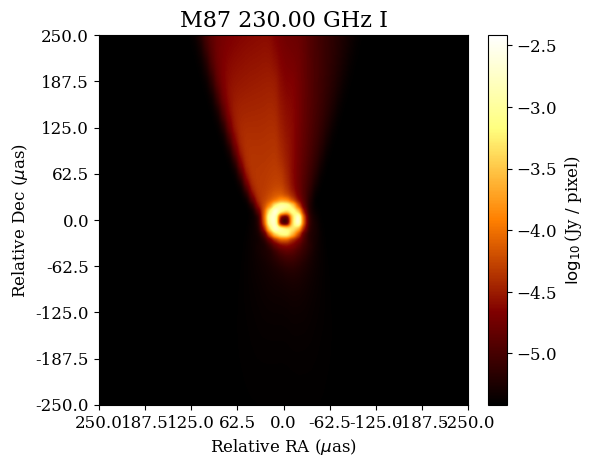

In [24]:
im0.display(scale='log')

(1e-07, 1)

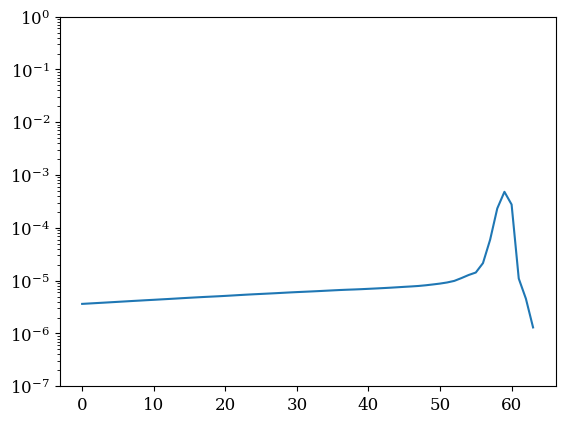

In [21]:
plt.semilogy(np.reshape(im1.imvec,(128,128))[:64,64])
plt.ylim(1e-7,1)

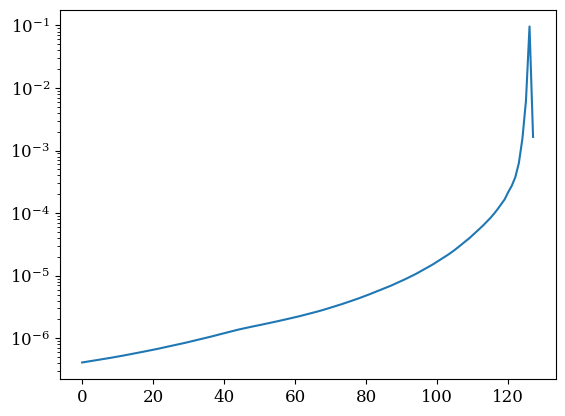

In [10]:
plt.semilogy(np.reshape(im0.imvec,(256,256))[:128,128])

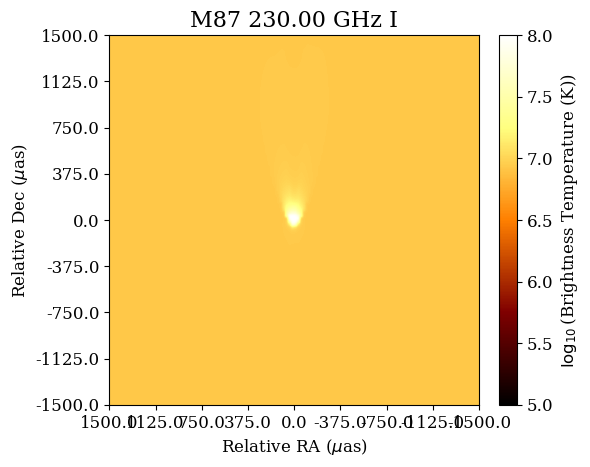

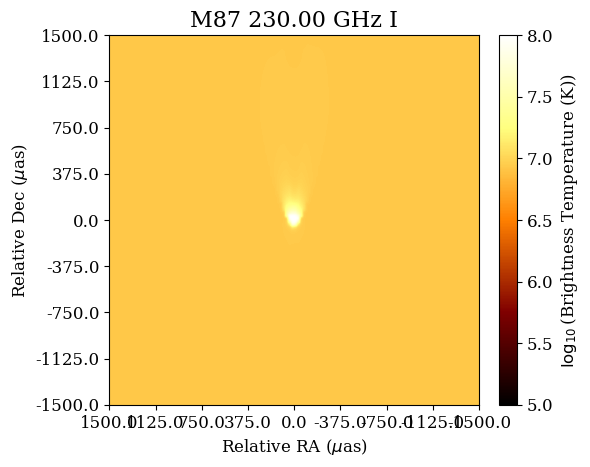

In [46]:
ims[0].display(scale='log',cbar_unit=['Tb'],cbar_lims=[5,8])

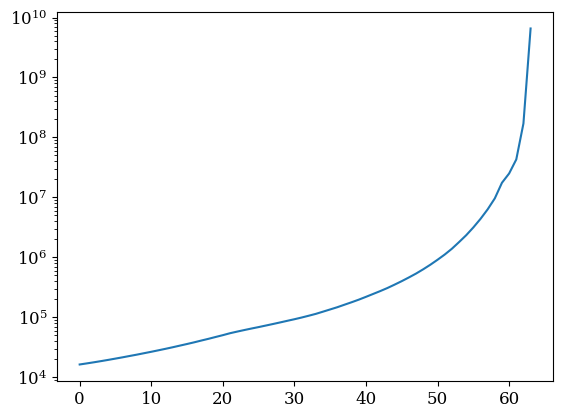

In [37]:
plt.semilogy(np.reshape(ims[0].imvec*3.254e13 / (ims[0].rf**2 * ims[0].psize**2),(128,128))[:64,64])

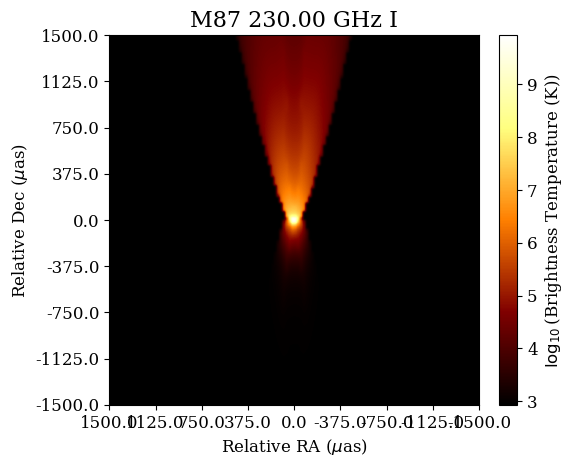

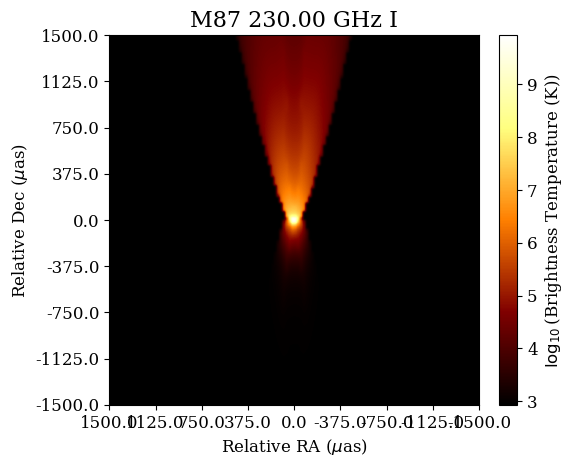

In [29]:
ims[0].display(scale='log',dynamic_range=[1e7],cbar_unit=['Tb'])

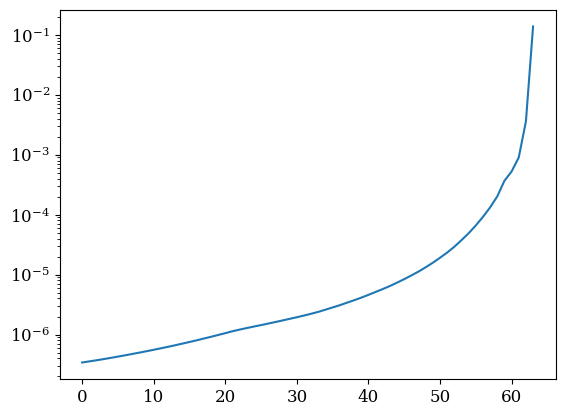

In [26]:
plt.semilogy(np.reshape(ims[0].imvec,(128,128))[:64,64])

/home/zgelles/anaconda3/lib/python3.12/site-packages/ehtim/image.py:3697: RuntimeWarning: invalid value encountered in divide
  m = (np.abs(qvec + 1j * uvec) / imvec).reshape(self.ydim, self.xdim)
/home/zgelles/anaconda3/lib/python3.12/site-packages/ehtim/image.py:3701: RuntimeWarning: invalid value encountered in divide
  maskb = (np.abs(qvec + 1j * uvec) / imvec).reshape(self.ydim, self.xdim) > mcut
/home/zgelles/anaconda3/lib/python3.12/site-packages/ehtim/image.py:3717: RuntimeWarning: invalid value encountered in divide
  m = (np.abs(qvec + 1j * uvec) / imvec).reshape(self.ydim, self.xdim)
/home/zgelles/anaconda3/lib/python3.12/site-packages/ehtim/image.py:3724: RuntimeWarning: invalid value encountered in divide
  voi = (vvec / imvec).reshape(self.ydim, self.xdim)


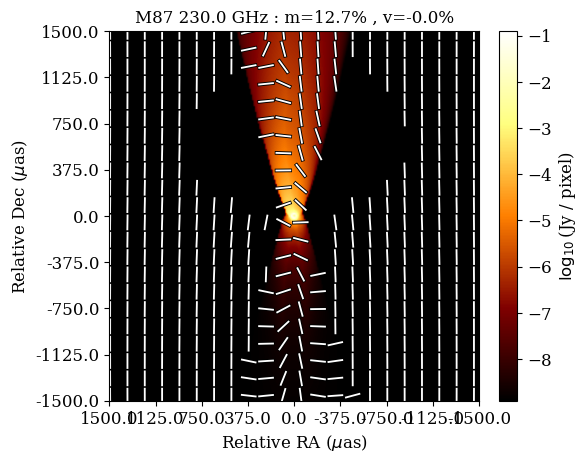

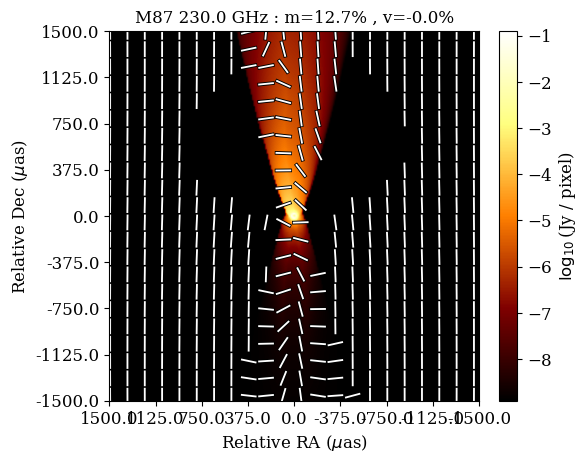

In [60]:
avgim_noeps_17[0].display(scale='log',dynamic_range=[1e8],plotp=True,pcut=0)

In [47]:
minR = 10
maxR = 1400 #in units of uas
narr = 1000
minphi = -np.pi/2 #measured CCW from north
maxphi = np.pi/2
b2pars_noeps_17 = [argb2_interp(im, minR, maxR, minphi, maxphi, narr) for im in avgim_noeps_17]
b2pars_noeps_17_noCJ = [argb2_interp(im, minR, maxR, 0, maxphi, narr) for im in avgim_noeps_17]

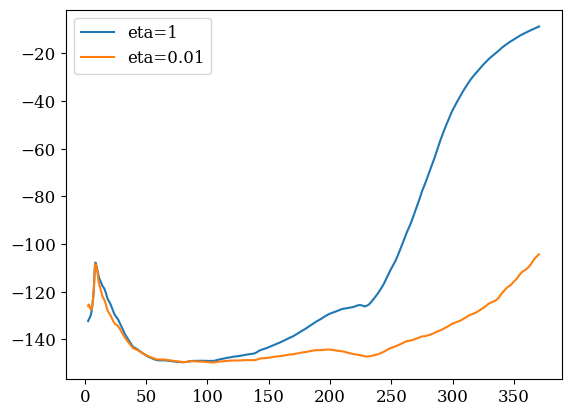

In [50]:
plt.plot(b2pars_noeps_17[0][0]/MoD,b2pars_noeps_17_noCJ[0][1],label='eta=1')
plt.plot(b2pars_noeps_17[1][0]/MoD,b2pars_noeps_17_noCJ[1][1],label='eta=0.01')
plt.legend()

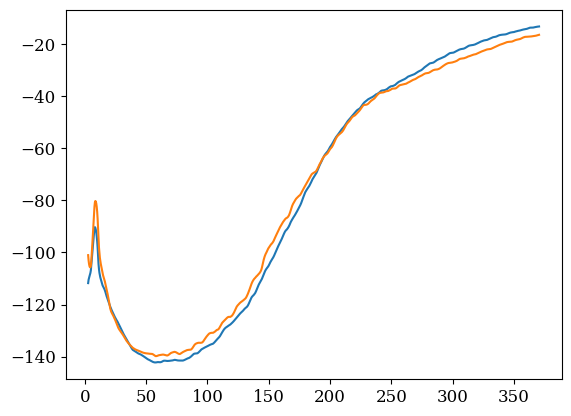

In [48]:
plt.plot(b2pars_noeps_17[0][0]/MoD,b2pars_noeps_17[0][1])
plt.plot(b2pars_noeps_17[1][0]/MoD,b2pars_noeps_17[1][1])

In [18]:
#define parameters
ROUT = 4.e10 # sgra distance in M
Nphi = 2500 #number of points in row on image
Nb = 50
bmin = 5#np.min(np.abs(b2pars_noeps_17[0][0]/MoD))*.5
bmax = 375#np.max(np.abs(b2pars_noeps_17[0][0]/MoD))
bvals = np.linspace(bmin, bmax, Nb)
NGEO = 200 #number of points per geodesic (for guessing before root-finder)
neqmax = 2
model = 'para' #'para' for paraboloid otherwise monopole
model2 = 'power'

INC = 17*np.pi/180
spins = np.array([0.3, 0.5, 0.7, 0.9])
rp = 1+np.sqrt(1-spins**2)
thetap = np.pi/2*.99
shift = 10
psitarget = kg.solver.psi_BZ_para(rp, thetap, spins, shift=shift)

minphi = np.pi/2
maxphi = np.pi
phivals = np.arange(minphi, maxphi, (maxphi-minphi)/Nphi)
phigrid, bgrid = np.meshgrid(phivals, bvals)

alphagrid = bgrid*np.cos(phigrid)
betagrid = bgrid*np.sin(phigrid)

In [19]:
outgeo_5 = raytrace_ana(a=spins[1],
                observer_coords = [0,ROUT,INC,0],
                image_coords = [alphagrid.flatten(), betagrid.flatten()], #assumes 1D arrays of alpha and beta
                ngeo=NGEO,
                do_phi_and_t=True,
                savedata=False, plotdata=False)

calculating preliminaries...
integrating in theta...41.66 s
integrating in r...47.07 s
done!   89.04990983009338  seconds!


In [4]:
spins = [0.3, 0.5, 0.7, 0.9]
for spin in spins:
    outname = 'pklfiles/spin'+str(spin)+'geo_highres_inc17_fulltop.pkl'
    outgeo = raytrace_ana(a=spin,
                 observer_coords = [0,ROUT,INC,0],
                 image_coords = [alphagrid.flatten(), betagrid.flatten()], #assumes 1D arrays of alpha and beta
                 ngeo=NGEO,
                 do_phi_and_t=True,
                 savedata=False, plotdata=False)
    with open(outname, 'wb') as file:
        pickle.dump(outgeo, file)
    file.close()
spins = np.array([0.3, 0.5, 0.7,0.9])

calculating preliminaries...
integrating in theta...81.36 s


/home/zgelles/anaconda3/lib/python3.12/site-packages/kgeo/scipy_ellip_binding.py:215: RuntimeWarning: divide by zero encountered in divide
  p_m = (z_m*(x_m+y_m+q_m) - x_m*y_m) / (z_m + q_m)


integrating in r...108.72 s
done!   190.75101971626282  seconds!
calculating preliminaries...
integrating in theta...81.35 s
integrating in r...110.48 s
done!   192.54314303398132  seconds!
calculating preliminaries...
integrating in theta...85.68 s
integrating in r...107.40 s
done!   193.87669610977173  seconds!
calculating preliminaries...


/home/zgelles/anaconda3/lib/python3.12/site-packages/kgeo/scipy_ellip_binding.py:215: RuntimeWarning: invalid value encountered in divide
  p_m = (z_m*(x_m+y_m+q_m) - x_m*y_m) / (z_m + q_m)


integrating in theta...83.39 s
integrating in r...109.07 s
done!   193.11719250679016  seconds!


In [11]:
endpiece = 'highres_inc17'
# with open('pklfiles/spin0.3geo_{}.pkl'.format(endpiece), 'rb') as file:
#     outgeo_3 = pickle.load(file)
# file.close()
with open('pklfiles/spin0.5geo_{}.pkl'.format(endpiece), 'rb') as file:
    outgeo_5 = pickle.load(file)
file.close()
# with open('pklfiles/spin0.7geo_{}.pkl'.format(endpiece), 'rb') as file:
#     outgeo_7 = pickle.load(file)
# file.close()
# with open('pklfiles/spin0.9geo_{}.pkl'.format(endpiece), 'rb') as file:
#     outgeo_9 = pickle.load(file)
# file.close()

In [20]:
sigma = 1
gammamax = 2.5
sigmaplasma = 1
emit='sigma'
pathcor = 'R'
specind = 0.5

spinind = 1
ivec_5_power, qvec_5_power, uvec_5_power, evpa_5_power, r_5_power, th_5_power = getstokes(psitarget[spinind], alphagrid, betagrid, ROUT, INC, spins[spinind], NGEO, do_phi_and_t = True, model=model, neqmax=neqmax, outgeo=outgeo_5, nu_parallel = 'FF', vel='driftframe', sigma = sigma, gammamax=gammamax, retvals=True, sigmaplasma=sigmaplasma, emit=emit, pathcor=pathcor, specind=specind, shift=shift)


(4, 125000)
before solve


/home/zgelles/anaconda3/lib/python3.12/site-packages/kgeo/solver.py:205: RuntimeWarning: RMS of 0.00403988 reached
  outqty = scipy.optimize.newton(get_coord_intersect, guesses, maxiter=500, tol=tol)


after solve
guesses before  (4, 125000)


In [16]:
nannulus = 2
mmode = 2
b2ind = -1
b5_power = getargbeta(qvec_5_power[b2ind], uvec_5_power[b2ind], mmode, nannulus, bvals, phigrid)
b5_power[b5_power<-np.pi] += 2*np.pi

Text(0.5, 1.0, 'Polarization of Shifted Paraboloid with $a=0.5$')

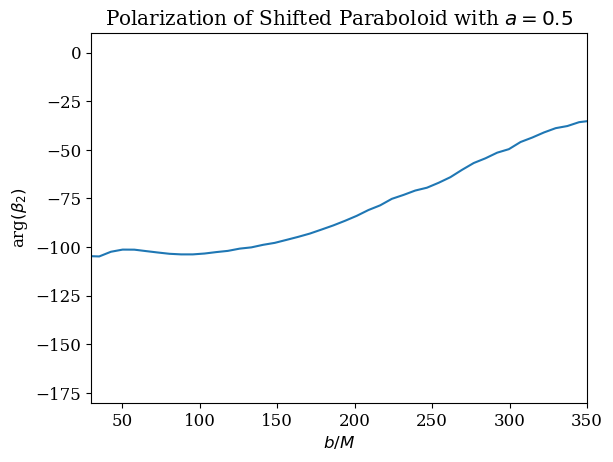

In [24]:
plt.plot(bvals,b5_power*180/np.pi)
plt.ylim(-180,10)
plt.xlim(30,350)
plt.xlabel(r'$b/M$')
plt.ylabel(r'arg$(\beta_2)$')
plt.title('Polarization of Shifted Paraboloid with $a=0.5$')

In [ ]:
sigma = 1
gammamax = 2.5
sigmaplasma = 1
emit='sigma'
pathcor = 'R'
specind = 0.5
thetahorizon = 60*np.pi/180
pval = 0.7
psitarget2 = rp**pval*(1-np.cos(.999*thetahorizon))

# spinind = 0
# ivec_3_power, qvec_3_power, uvec_3_power, evpa_3_power, r_3_power, th_3_power = getstokes(psitarget2[spinind], alphagrid, betagrid, ROUT, INC, spins[spinind], NGEO, do_phi_and_t = True, model=model2, neqmax=neqmax, outgeo=outgeo_3, nu_parallel = 'FF', vel='driftframe', sigma = sigma, gammamax=gammamax, retvals=True, pval=pval, sigmaplasma=sigmaplasma, emit=emit, pathcor=pathcor, specind=specind)

spinind = 1
ivec_5_power, qvec_5_power, uvec_5_power, evpa_5_power, r_5_power, th_5_power = getstokes(psitarget2[spinind], alphagrid, betagrid, ROUT, INC, spins[spinind], NGEO, do_phi_and_t = True, model=model2, neqmax=neqmax, outgeo=outgeo_5, nu_parallel = 'FF', vel='driftframe', sigma = sigma, gammamax=gammamax, retvals=True, pval=pval, sigmaplasma=sigmaplasma, emit=emit, pathcor=pathcor, specind=specind)

# spinind = 2
# ivec_7_power, qvec_7_power, uvec_7_power, evpa_7_power, r_7_power, th_7_power = getstokes(psitarget2[spinind], alphagrid, betagrid, ROUT, INC, spins[spinind], NGEO, do_phi_and_t = True, model=model2, neqmax=neqmax, outgeo=outgeo_7, nu_parallel = 'FF', vel='driftframe', sigma = sigma, gammamax=gammamax, retvals=True, pval=pval, sigmaplasma=sigmaplasma, emit=emit, pathcor=pathcor, specind=specind)


# psitarget2 = rp**pval*(1-np.cos(np.pi/2))*1.0
# gammamax = None

spinind = 3
ivec_9_power, qvec_9_power, uvec_9_power, evpa_9_power, r_9_power, th_9_power = getstokes(psitarget2[spinind], alphagrid, betagrid, ROUT, INC, spins[spinind], NGEO, do_phi_and_t = True, model=model2, neqmax=neqmax, outgeo=outgeo_9, nu_parallel = 'FF', vel='driftframe', sigma = sigma, gammamax=gammamax, retvals=True, pval=pval, sigmaplasma=sigmaplasma, emit=emit, pathcor=pathcor, specind=specind)

(4, 250000)
before solve


/home/zgelles/anaconda3/lib/python3.12/site-packages/kgeo/solver.py:43: RuntimeWarning: invalid value encountered in power
  return r**pval*(1-np.abs(np.cos(theta)))
/home/zgelles/anaconda3/lib/python3.12/site-packages/kgeo/solver.py:203: RuntimeWarning: RMS of 0.00620142 reached
  outqty = scipy.optimize.newton(get_coord_intersect, guesses, maxiter=500, tol=tol)


after solve
guesses before  (4, 250000)


/home/zgelles/anaconda3/lib/python3.12/site-packages/kgeo/bfields.py:499: RuntimeWarning: invalid value encountered in divide
  dpsidr = p*psi/r
/home/zgelles/anaconda3/lib/python3.12/site-packages/kgeo/bfields.py:507: RuntimeWarning: invalid value encountered in divide
  Br = C*dpsidtheta / gdet
/home/zgelles/anaconda3/lib/python3.12/site-packages/kgeo/bfields.py:509: RuntimeWarning: invalid value encountered in divide
  Bph = I / (2*np.pi*Delta*sth2)
/home/zgelles/anaconda3/lib/python3.12/site-packages/kgeo/velocities.py:389: RuntimeWarning: invalid value encountered in sqrt
  nunum = ffunc*bred+np.sign(np.cos(theta))*np.sign(r-r0)*Aconst*np.sqrt(Aconst**2-ffunc**2+bred**2)
/home/zgelles/anaconda3/lib/python3.12/site-packages/kgeo/equatorial_images.py:302: RuntimeWarning: divide by zero encountered in divide
  TH = eta + a2*cth2 - lam*lam*cth2/sth2
/home/zgelles/anaconda3/lib/python3.12/site-packages/kgeo/equatorial_images.py:305: RuntimeWarning: invalid value encountered in sqrt
  g

In [15]:
def getargbeta(Q, U, mmode, nannulus, Rvals, phigrid): #nannulus is a parameter for the width of the annulus to smooth over
    Phere = Q+1j*U
    betam = np.sum(Phere*np.exp(-1j*mmode*phigrid),axis=1)*Rvals
    betamroll = betam if nannulus == 0 else np.sum(betam+np.array([np.roll(betam,i)+np.roll(betam,-i) for i in range(1,nannulus+1,1)]),axis=0)
    argbetam = -np.angle(betamroll)-np.pi
    return argbetam

In [8]:
nannulus = 2
mmode = 2
b2ind = -1
# b3_power = getargbeta(qvec_3_power[b2ind], uvec_3_power[b2ind], mmode, nannulus, bvals, phigrid)
# b3_power[b3_power<-np.pi] += 2*np.pi
# b5_power = getargbeta(qvec_5_power[b2ind], uvec_5_power[b2ind], mmode, nannulus, bvals, phigrid)
# b5_power[b5_power<-np.pi] += 2*np.pi
# b7_power = getargbeta(qvec_7_power[b2ind], uvec_7_power[b2ind], mmode, nannulus, bvals, phigrid)
# b7_power[b7_power<-np.pi] += 2*np.pi
b9_power = getargbeta(qvec_9_power[b2ind], uvec_9_power[b2ind], mmode, nannulus, bvals, phigrid)
b9_power[b9_power<-np.pi] += 2*np.pi

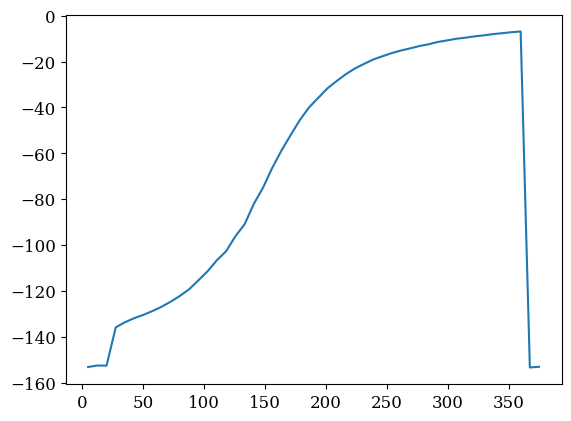

In [9]:
plt.plot(bvals,b9_power*180/np.pi)

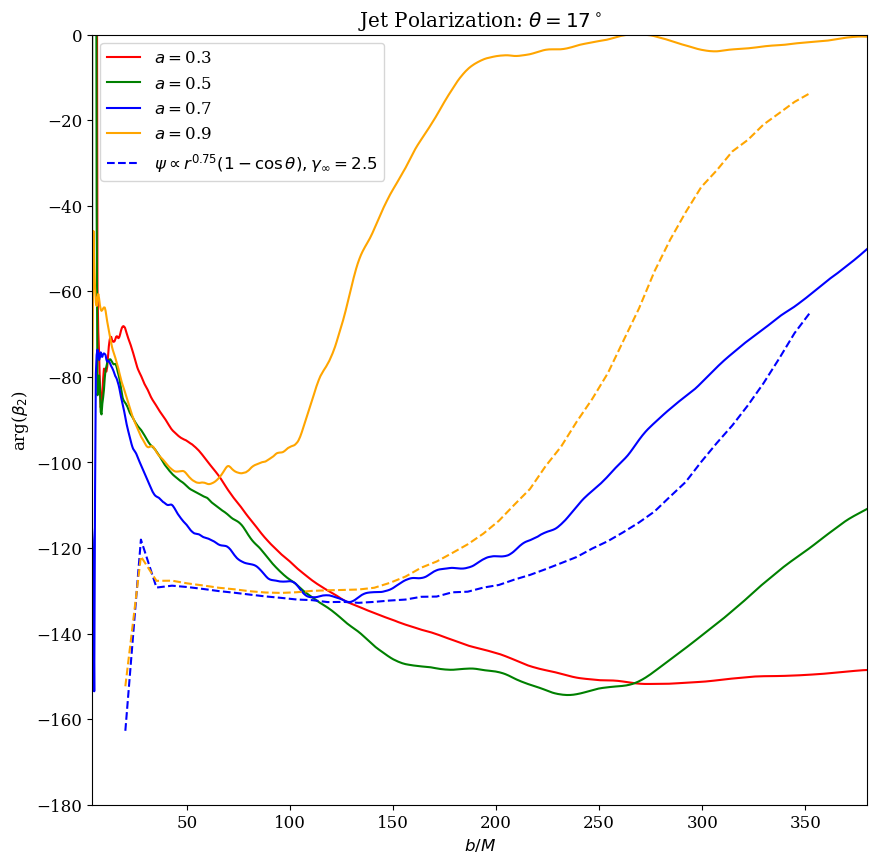

In [25]:
fig, ax = plt.subplots(1,figsize=(10,10))
end = 1
colors = ['r','g','b','orange']
for i in range(len(b2pars_noeps_17_noCJ)):
    plt.plot(b2pars_noeps_17_noCJ[i][0]/MoD,b2pars_noeps_17_noCJ[i][1],color=colors[i],label=r'$a=$'+str(spins[i]))
# plt.plot(bvals[nannulus:len(bvals)-nannulus-end],b3_power[nannulus:len(bvals)-nannulus-end]*180/np.pi,'--',color=colors[0])
# plt.plot(bvals[nannulus:len(bvals)-nannulus-end],b5_power[nannulus:len(bvals)-nannulus-end]*180/np.pi,'--',color=colors[1])
plt.plot(bvals[nannulus:len(bvals)-nannulus-end],b7_power[nannulus:len(bvals)-nannulus-end]*180/np.pi,'--',color=colors[2],label=r'$\psi\propto r^{0.75}(1-\cos\theta),\gamma_\infty=2.5$')
plt.plot(bvals[nannulus:len(bvals)-nannulus-end],b9_power[nannulus:len(bvals)-nannulus-end]*180/np.pi,'--',color=colors[3])
plt.ylim(-180,0)
plt.xlim(4,380)
plt.xlabel(r'$b/M$')
plt.ylabel(r'arg($\beta_2$)')
plt.title(r'Jet Polarization: $\theta=17^\circ$')
plt.legend()
plt.savefig('Figures/jet_compare_semi.png',bbox_inches='tight',dpi=300)
plt.savefig('Figures/jet_compare_semi.pdf',bbox_inches='tight',dpi=300)

In [ ]:
psitarget = rp*np.log(4)*1.0
gammamax = None
ivec_7_para, qvec_7_para, uvec_7_para, evpa_7_para, r_7_para, th_7_para = getstokes(psitarget[spinind], alphagrid, betagrid, ROUT, INC, spins[spinind], NGEO, do_phi_and_t = True, model=model, neqmax=neqmax, outgeo=outgeo_7, nu_parallel = 'FF', vel='driftframe', sigma = sigma, gammamax=gammamax, retvals=True, pval=pval, sigmaplasma=sigmaplasma, emit=emit, pathcor=pathcor, specind=specind)